# Sophinas Notebook

## Stage 1: Exploratory Data Analysis





### 1. Data Loading & Initial Inspection
In this section, I load the Scottish Haggis dataset and perform an initial inspection to understand its structure, size, and core properties. 

This includes:
- checking the number of observations and features, 
- previewing the data
- identifying any immediate issues that may influence later cleaning and modelling.

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

sns.set(style="whitegrid")

print("Libraries imported successfully.")

df = pd.read_csv("../data/scottish_haggis_2025.csv")

print("Shape (rows, columns):", df.shape)

df.head()


Libraries imported successfully.
Shape (rows, columns): (344, 9)


,id,species,island,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,sex,year
0,1,Macduff,Skye,34.47,17.77,190.23,3813.55,female,2025
1,2,Macduff,Skye,40.67,19.91,202.80,4860.88,male,2025
2,3,Macduff,Skye,38.90,16.31,184.34,3302.49,female,2025
3,4,Macduff,Skye,37.15,19.82,190.97,4217.32,male,2025
4,5,Macduff,Skye,37.86,18.79,193.00,3082.64,female,2025


### 2. Exploratory Data Analysis (EDA)

In this section, I examine the overall structure of the dataset. This includes:
- checking the data types of each column,
- identifying any missing values,
- reviewing descriptive statistics for numerical features,
- and inspecting category distributions for categorical variables.

This step helps identify potential issues such as incorrect data types, inconsistent categories, impossible values, or missing data. The insights gained here will inform data cleaning and preparation for later modelling stages.

In [118]:
print("=== DataFrame Info ===")
df.info()

print("\n=== Missing Values per Column ===")
df.isnull().sum()

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              344 non-null    int64  
 1   species         344 non-null    object 
 2   island          344 non-null    object 
 3   nose_length_mm  342 non-null    float64
 4   eye_size_mm     342 non-null    float64
 5   tail_length_mm  342 non-null    float64
 6   body_mass_g     342 non-null    float64
 7   sex             334 non-null    object 
 8   year            344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB

=== Missing Values per Column ===


id                 0
species            0
island             0
nose_length_mm     2
eye_size_mm        2
tail_length_mm     2
body_mass_g        2
sex               10
year               0
dtype: int64

In [119]:
print("=== Summary Statistics ===")
df.describe()

=== Summary Statistics ===


,id,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.939883,17.159006,200.901374,4205.796287,2024.029070
std,99.448479,5.477357,1.995574,14.121750,802.563431,0.818356
min,1.000000,32.080000,13.120000,171.000000,2616.550000,2023.000000
25%,86.750000,39.355000,15.462500,189.420000,3572.057500,2023.000000
50%,172.500000,44.540000,17.385000,196.730000,4045.035000,2024.000000
75%,258.250000,48.360000,18.700000,212.900000,4798.850000,2025.000000
max,344.000000,59.030000,21.610000,232.340000,6235.810000,2025.000000


In [120]:
categorical_cols = ["species", "island", "sex"]

for col in categorical_cols:
    print(f"\n=== Value counts for {col} ===")
    print(df[col].value_counts(dropna=False))


=== Value counts for species ===
species
Macduff        140
WildRambler    124
BogSniffler     80
Name: count, dtype: int64

=== Value counts for island ===
island
Skye        168
Shetland    124
Iona         52
Name: count, dtype: int64

=== Value counts for sex ===
sex
male      168
female    165
NaN        10
green       1
Name: count, dtype: int64


#### 3. Visual Exploratory Data Analysis

In this section, I use visualisations to understand the distributions of numerical features, identify potential outliers, and explore relationships between variables. This will help determine whether transformations, scaling, or special handling of certain features is necessary before clustering and classification.


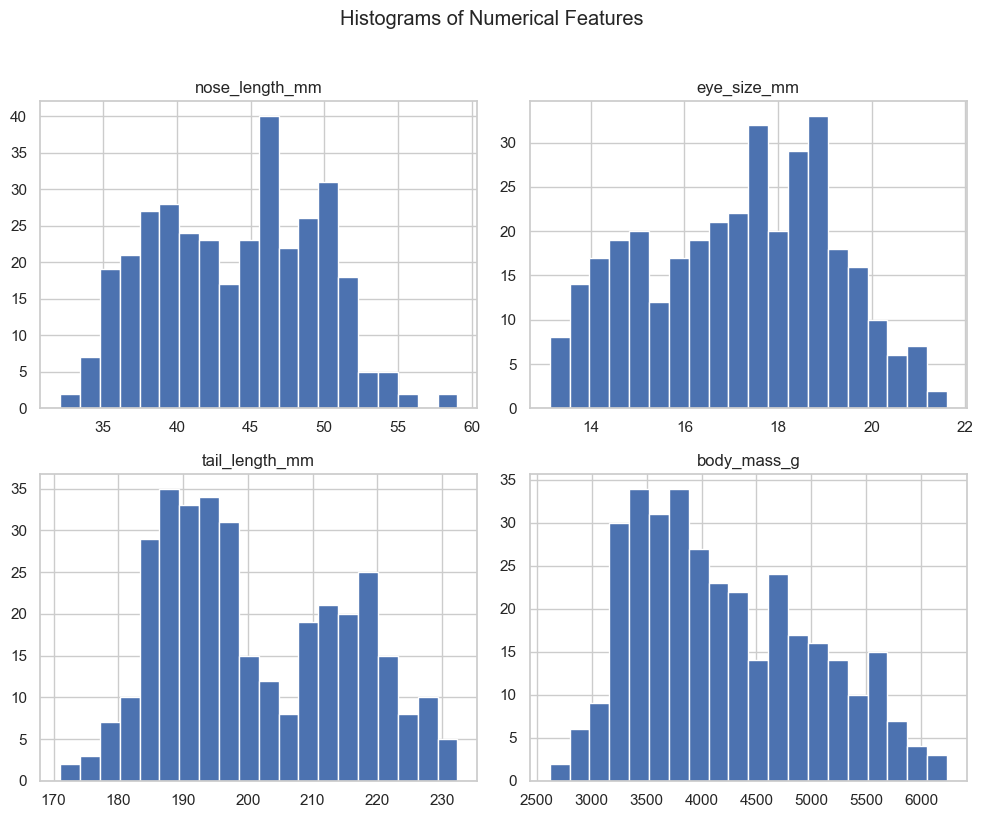

In [121]:
numeric_cols = ["nose_length_mm", "eye_size_mm", "tail_length_mm", "body_mass_g"]

df[numeric_cols].hist(bins=20, figsize=(10, 8))
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()

#### 3.1 Histogram Observations

- **nose_length_mm**: The distribution appears [approximately normal / right-skewed / left-skewed]. There are [no / a few] extreme values, so I [do not / might] need to consider transformations later.
- **eye_size_mm**: The spread is [narrow / wide], suggesting [low / high] variability between haggis. Extreme values could indicate measurement noise or rare subtypes.
- **tail_length_mm**: The distribution is [describe shape]. If strongly skewed, this could affect distance-based methods like K-Means and KNN, making scaling and potentially transformation important.
- **body_mass_g**: There is a [clear peak / long tail]. Very large or very small body masses may act as outliers and could dominate Euclidean-distance based algorithms if not scaled.

Overall, none of the distributions show obviously impossible values (e.g. negative lengths or masses). However, skewed features and potential outliers will need to be considered when choosing models and when deciding whether to scale or transform features.


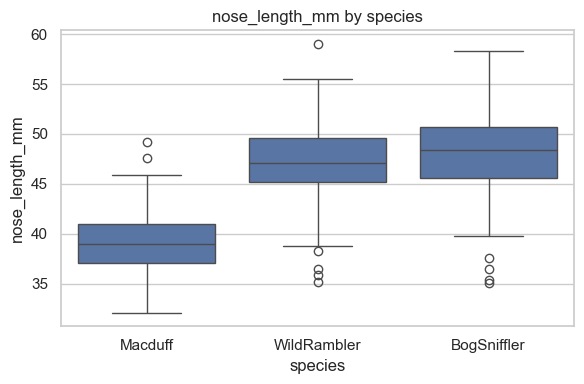

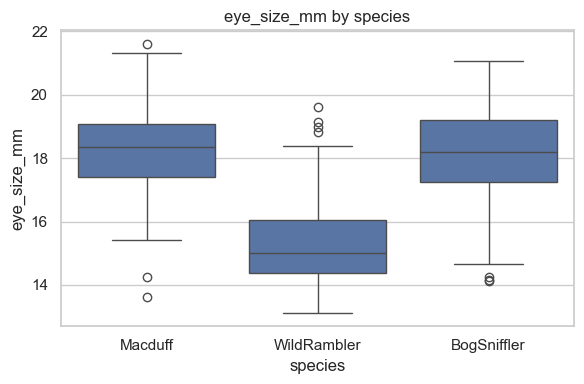

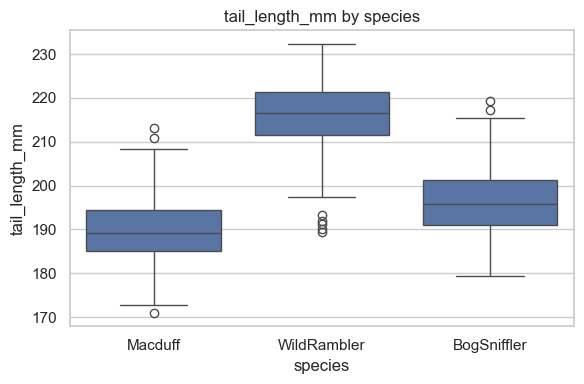

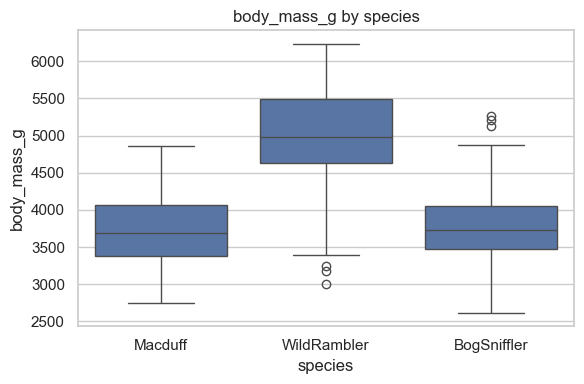

In [122]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x="species", y=col)
    plt.title(f"{col} by species")
    plt.tight_layout()
    plt.show()


#### 3.2 Boxplot Observations (by Species)

- For **nose_length_mm**, species differ noticeably: [e.g. one species has consistently longer noses]. This suggests nose length may be a strong discriminating feature for classification and clustering.
- For **eye_size_mm**, the medians across species are [similar / clearly different]. If differences are small, this feature may contribute less to separating species.
- **tail_length_mm** shows [clear separation / overlap] between species. Outliers (points far from the box) indicate a few unusual individuals which could influence K-Means centroids.
- **body_mass_g** varies by species, with [species X] generally heavier/lighter. This again suggests body mass is informative for species prediction.

Across all features, there are some visible outliers. I will keep them for now to reflect the true biological variability, but I need to be aware that algorithms sensitive to outliers (e.g. K-Means, Linear Regression) may be affected.


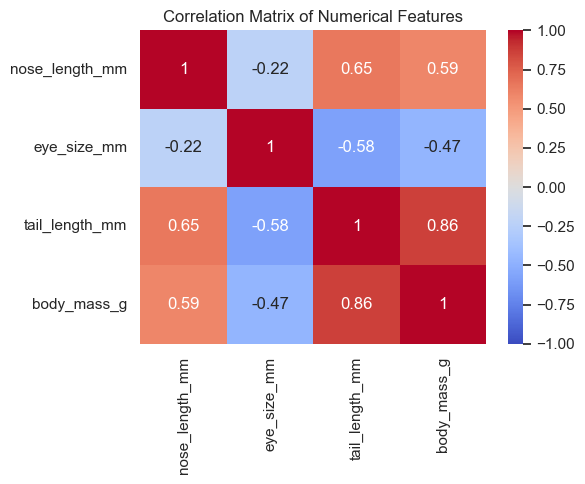

In [123]:
plt.figure(figsize=(6, 5))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()


#### 3.3 Correlation Observations

- There is a **[strong/moderate/weak] positive/negative** correlation between **A** and **B** (e.g. tail_length_mm and body_mass_g). This suggests larger haggis tend to have [longer tails / other pattern].
- Other feature pairs show [low / negligible] correlation, meaning they capture different aspects of the haggis morphology and may provide complementary information to the models.
- No correlations are so high (close to 1.0 or -1.0) that multicollinearity is an immediate concern, but highly correlated features could still reduce the marginal benefit of some variables in linear models.

These correlations will be relevant later:
- For **regression**, to understand potential multicollinearity and interpret coefficients.
- For **clustering**, correlated features may pull clusters along specific directions in feature space.
